- https://stackoverflow.com/questions/63654590/plotting-spatial-data-on-a-heatmap
- https://numpy.org/doc/stable/reference/generated/numpy.histogram2d.html
- https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hexbin.html
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.LinearNDInterpolator.html#scipy.interpolate.LinearNDInterpolator

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

N = 10000
a = np.array([-10, -10, 0])
b = np.array([15, 15, 0])
x0 = 3*np.random.randn(N, 3) + a
x1 = 5*np.random.randn(N, 3) + b
x = np.vstack([x0, x1])
v0 = np.exp(-0.01*np.linalg.norm(x0-a, axis=1)**2)
v1 = np.exp(-0.01*np.linalg.norm(x1-b, axis=1)**2)
v = np.hstack([v0, v1])

In [2]:
v

array([0.81643892, 0.61891643, 0.50118502, ..., 0.59023713, 0.89061691,
       0.58387601])

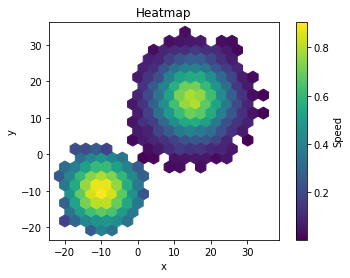

In [3]:
pc = plt.hexbin(x[:,0], x[:,1], C=v, gridsize=20)
pc.axes.set_title("Heatmap")
pc.axes.set_xlabel("x")
pc.axes.set_ylabel("y")
pc.axes.set_aspect("equal")
cb = plt.colorbar(ax=pc.axes)
cb.set_label("Speed")

In [4]:
c, *_ = np.histogram2d(x[:,0], x[:,1], bins=20)
s, xbin, ybin = np.histogram2d(x[:,0], x[:,1], bins=20, weights=v)
lims = [xbin.min(), xbin.max(), ybin.min(), ybin.max()]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


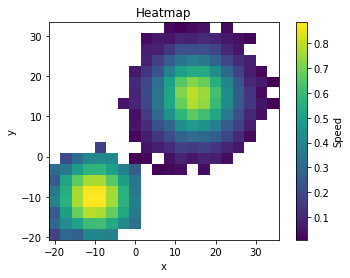

In [5]:
iax = plt.imshow((s/c).T, extent=lims, origin='lower')
iax.axes.set_title("Heatmap")
iax.axes.set_xlabel("x")
iax.axes.set_ylabel("y")
iax.axes.set_aspect("equal")
cb = plt.colorbar(ax=iax.axes)
cb.set_label("Speed")

In [6]:
from scipy import interpolate
ndpol = interpolate.LinearNDInterpolator(x[:,:2], v)

In [7]:
xl = np.linspace(-20, 30, 20)
X, Y = np.meshgrid(xl, xl)
lims = [xl.min(), xl.max(), xl.min(), xl.max()]

In [8]:
V = ndpol(list(zip(X.ravel(),Y.ravel()))).reshape(X.shape)

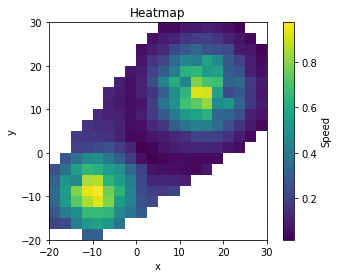

In [9]:
iax = plt.imshow(V, extent=lims, origin='lower')
iax.axes.set_title("Heatmap")
iax.axes.set_xlabel("x")
iax.axes.set_ylabel("y")
iax.axes.set_aspect("equal")
cb = plt.colorbar(ax=iax.axes)
cb.set_label("Speed")

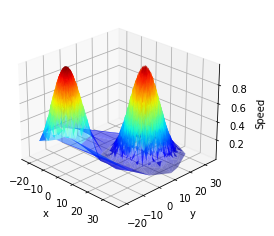

In [12]:
import matplotlib.tri as mtri
#tri = mtri.Triangulation()
axe = plt.axes(projection='3d')
axe.plot_trisurf(x[:,0], x[:,1], v, cmap='jet', alpha=0.5)
axe.set_xlabel("x")
axe.set_ylabel("y")
axe.set_zlabel("Speed")
axe.view_init(elev=25, azim=-45)

<a list of 10 text.Text objects>

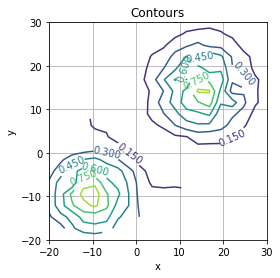

In [11]:
iax = plt.contour(X, Y, V)
iax.axes.set_title("Contours")
iax.axes.set_xlabel("x")
iax.axes.set_ylabel("y")
iax.axes.set_aspect("equal")
iax.axes.grid()
iax.axes.clabel(iax)

In [15]:
import io
import pandas as pd

In [43]:
file1 = io.StringIO("""(-2 -1.5 0.1)
(5 -1.5 0.1)
(-2 -1.5 0.6)
(5 -1.5 0.6)
(-2 1.92708 0.1)""")
file1 = io.StringIO(file1.read().replace("(", "").replace(")", ""))
x = pd.read_csv(file1, sep=" ", header=None).values
x

array([[-2.     , -1.5    ,  0.1    ],
       [ 5.     , -1.5    ,  0.1    ],
       [-2.     , -1.5    ,  0.6    ],
       [ 5.     , -1.5    ,  0.6    ],
       [-2.     ,  1.92708,  0.1    ]])

In [34]:
file2 = io.StringIO("""0.08 
0.07
0.1 
0.34""")
v = pd.read_csv(file2, header=None).squeeze().values
v

array([0.08, 0.07, 0.1 , 0.34])